<a href="https://colab.research.google.com/github/sharon-raj-1718/CE888/blob/main/lab__bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [ ]:
def create_bootstrap_sample(data, sample_size):
  return [np.random.choice(data) for _ in range(sample_size)]

In [ ]:
def create_samples_func(x, sample_size, n_bootstraps, func):
  return [func(create_bootstrap_sample(x, sample_size)) for _ in range(n_bootstraps)]

def create_samples_means(x, sample_size, n_bootstraps):
  return create_samples_func(x, sample_size, n_bootstraps, np.mean)

def create_samples_std(x, sample_size, n_bootstraps):
  return create_samples_func(x, sample_size, n_bootstraps, np.std)

In [ ]:
def bootstrap_mean(x, sample_size, n_bootstraps):
  sample_means = create_samples_means(x, sample_size, n_bootstraps)
  data_mean = np.mean(sample_means)
  lower, upper = np.percentile(sample_means, 2.5), np.percentile(sample_means, 100-2.5)
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

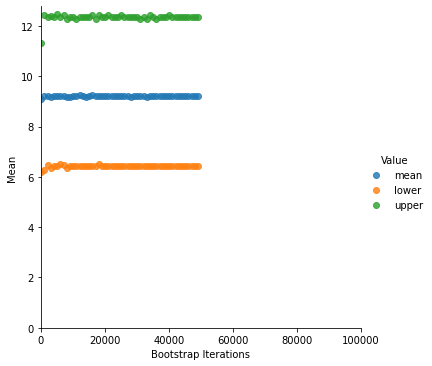

In [ ]:
# Call your bootstrap function and plot the results
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [ ]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  sample_means = create_samples_means(sample, sample_size, n_bootstraps)
  data_mean = np.mean(sample_means)
  diff = (100 - ci) / 2
  lower, upper = np.percentile(sample_means, diff), np.percentile(sample_means, 100 - diff)
  return data_mean, lower, upper

In [ ]:
def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
  sample_means = create_samples_std(sample, sample_size, n_bootstraps)
  data_mean = np.mean(sample_means)
  diff = (100 - ci) / 2
  lower, upper = np.percentile(sample_means, diff), np.percentile(sample_means, 100 - diff)
  return data_mean, lower, upper

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

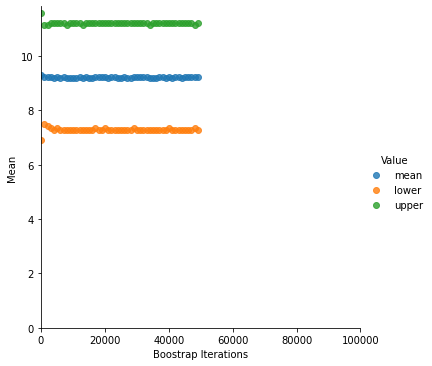

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)


In [ ]:
bootstrap_mean_ci(data, len(data), 10000, 95)

(9.215992857142856, 6.357142857142857, 12.357142857142858)

In [ ]:
bootstrap_std_ci(data, len(data), 10000, 90)

(5.352684748051754, 3.0380243311623913, 7.105617208826223)

# Vehicles dataset




In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

In [ ]:
filter_nan = lambda data: data[~np.isnan(data)]

current = filter_nan(df['Current fleet'].values)
new = filter_nan(df['New Fleet'].values)

In [ ]:
df['current_len'] = range(len(current))
df['new_len'] = list(range(len(new))) + [np.nan for _ in range(len(df) - len(new))]

In [ ]:
df.head()

,Current fleet,New Fleet,current_len,new_len
0,18,24.0,0,0.0
1,15,27.0,1,1.0
2,18,27.0,2,2.0
3,16,25.0,3,3.0
4,17,31.0,4,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
 2   current_len    249 non-null    int64  
 3   new_len        79 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 7.9 KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


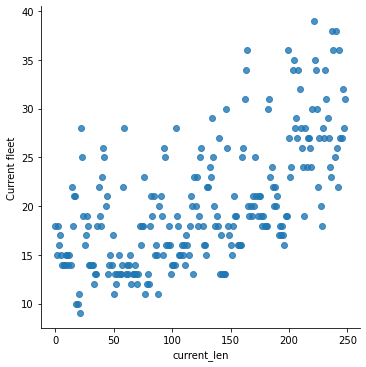

In [ ]:
sns.lmplot('current_len', 'Current fleet', data=df, fit_reg=False)

# Quiz question

In [ ]:
# The variables below represent the percentages of democratic votes in Pennsylvania and Ohio (one value for each state).
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [ ]:
len(dem_share_PA)

67

In [ ]:
len(dem_share_OH)

88

In [ ]:
bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 25000, 90)

(44.31351705909091, 42.57815909090908, 46.02979545454545)

In [ ]:
bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 25000, 90)

(45.482403564179094, 43.56521641791044, 47.46808955223881)

In [ ]:
dem_share_PA = np.array(dem_share_PA)
dem_share_OH = np.array(dem_share_OH)

In [ ]:
permut_test(dem_share_OH, dem_share_PA, 20000)

0.2304